data source: https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

Let's add the libraries where they are really needed, not all of them at the first line

### Data frames

In [6]:
import pandas as pd
import seaborn as sns

In [2]:
address = '../data/creditcard.csv'
df = pd.read_csv(address)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

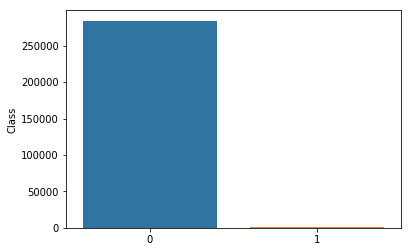

In [13]:
sns.barplot(y=df['Class'].value_counts(), x = [0,1])
# Fraud = 1 Okay = 0

### Data Pre-processing

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

In [22]:
X = df.drop('Class', axis=1)
y = df.Class

In [23]:
X = scalar.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Predictive modeling with Logestic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
lr.score(X_train,y_train)

0.9992714345278588

In [30]:
lr.score(X_test,y_test)

0.9991397773954567

In [31]:
y_predict = lr.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test,y_predict)

0.9991397773954567

### Implementation report

In [34]:
from sklearn.metrics import classification_report , confusion_matrix

In [35]:
import numpy as np

In [69]:
cm = np.array(confusion_matrix(
    y_true =  y_test,
    y_pred =  y_predict,
    labels = [1,0]
    )
)

confusion = pd.DataFrame(cm, index=['Fraud', 'no Fraud'],columns=['predicted Fraud','predicted no Fraud'])
confusion

,predicted Fraud,predicted no Fraud
Fraud,55,32
no Fraud,3,56872


In [70]:
import seaborn as sns

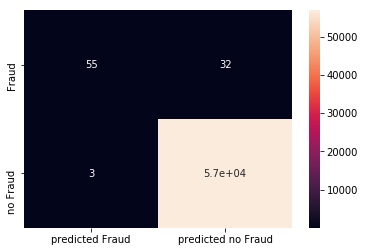

In [71]:
sns.heatmap(confusion, annot=True)

In [72]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



- The **recall** means "how many of this class you find over the whole number of element of this class"

- The **precision** will be "how many are correctly classified among that class"

- The **f1-score** is the harmonic mean between precision & recall

- The **support** is the number of occurence of the given class in your dataset (so you have 37.5K of class 0 and 37.5K of class 1, which is a really well balanced dataset.



### Predictive modeling with SVM

In [54]:
from sklearn.svm import SVC

In [55]:
model_svc = SVC()

In [56]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
model_svc.score(X_train,y_train)

0.9996752178015756

In [58]:
model_svc.score(X_test,y_test)

0.999385555282469

In [59]:
y_predict = model_svc.predict(X_test)

In [60]:
from sklearn import metrics

In [61]:
metrics.accuracy_score(y_test,y_predict)

0.999385555282469

### Implementation report

In [62]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'no Fraud'],columns=['predicted Fraud','predicted no Fraud'])
confusion

,predicted Fraud,predicted no Fraud
is Fraud,55,32
no Fraud,3,56872


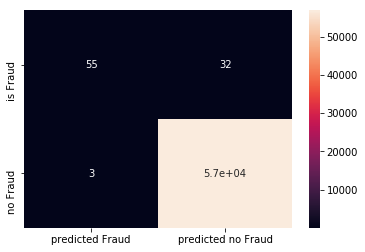

In [63]:
sns.heatmap(confusion, annot=True)

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.95      0.63      0.76        87

    accuracy                           1.00     56962
   macro avg       0.97      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962

